In [6]:
pip install tensorflow --user

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install seaborn --user

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install librosa --user

Note: you may need to restart the kernel to use updated packages.


In [9]:
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import random
import IPython.display as ipd
from IPython.core.display import display

C:\Users\DELL\AppData\Local\Temp\ipykernel_22920\1903451416.py:11: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


In [10]:
#load dataset - RAVDESS
mylist= os.listdir('F:/BE_project/Clinical_SER/Dataset/RAVDESS')

In [11]:
type(mylist)

list

In [12]:
print(mylist[0])

Actor_01


In [13]:
# create dataframe with path, label and duration
paths, labels, duration = [], [], []

for dirname, _, filenames in os.walk('F:/BE_project/Clinical_SER/Dataset/RAVDESS'):
    for filename in filenames:
        
        paths.append(os.path.join(dirname, filename))
        
        duration.append(round(librosa.get_duration(filename=paths[-1]), 3)) 
        
        label = filename[::-1].split('_')[0][::-1]
        
        if label[6:8] == '01':
            labels.append('neutral')
        elif label[6:8] == '02':
            labels.append('calm')
        elif label[6:8] == '03':
            labels.append('happy')
        elif label[6:8] == '04':
            labels.append('sad')
        elif label[6:8] == '05':
            labels.append('angry')
        elif label[6:8] == '06':
            labels.append('fear')
        elif label[6:8] == '07':
            labels.append('disgust')
        elif label[6:8] == '08':
            labels.append('surprise')       

df = pd.DataFrame({'path':paths,'duration': duration,  'emotion':labels})

df.head(5)

,path,duration,emotion
0,F:/BE_project/Clinical_SER/Dataset/RAVDESS\Act...,3.303,neutral
1,F:/BE_project/Clinical_SER/Dataset/RAVDESS\Act...,3.337,neutral
2,F:/BE_project/Clinical_SER/Dataset/RAVDESS\Act...,3.270,neutral
3,F:/BE_project/Clinical_SER/Dataset/RAVDESS\Act...,3.170,neutral
4,F:/BE_project/Clinical_SER/Dataset/RAVDESS\Act...,3.537,calm


In [14]:
trainlabel = df.iloc[:, -1:]

In [15]:
trainlabel.head()

,emotion
0,neutral
1,neutral
2,neutral
3,neutral
4,calm


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   path      2880 non-null   object 
 1   duration  2880 non-null   float64
 2   emotion   2880 non-null   object 
dtypes: float64(1), object(2)
memory usage: 67.6+ KB


In [19]:
# function to display samples information by emotion
 

def show_audio(emotion):
    # create sublots
    fig, axs = plt.subplots(nrows=1,ncols=3, figsize=(20,4))
    
    # filter dataframe to emotion
    df_show = df.loc[df['emotion'] == emotion].reset_index(drop=True)
    
    #select random
    index = random.randint(0, df_show.shape[0])
    
    # load audio file:
    y, sr = librosa.load(df_show.path[index], sr=16000)
    
    # Show waveform
    librosa.display.waveshow(y, sr=sr, ax=axs[0])
    axs[0].set_title('Waveform')
    
    # Extract fundamental frequency (f0) using a probabilistic approach
    f0, _, _ = librosa.pyin(y, sr=sr, fmin=50, fmax=1500, frame_length=2048)

    # Establish timepoint of f0 signal
    timepoints = np.linspace(0, df_show.duration[index], num=len(f0), endpoint=False)
    
    # Compute short-time Fourier Transform
    x_stft = np.abs(librosa.stft(y))
    
    # Apply logarithmic dB-scale to spectrogram 
    x_stft = librosa.amplitude_to_db(x_stft, ref=np.max)
     # Plot STFT spectrogram
    librosa.display.specshow(x_stft, sr=sr, x_axis="time", y_axis="log", ax=axs[1])
    
    # Plot fundamental frequency (f0) in spectrogram plot
    axs[1].plot(timepoints, f0, color="cyan", linewidth=4)
    axs[1].set_title('Spectrogram with fundamental frequency')
    
    # Extract 'n_mfcc' numbers of MFCCs components - in this case 20
    x_mfccs = librosa.feature.mfcc(y, sr=sr, n_mfcc=20)

    # Plot MFCCs
    librosa.display.specshow(x_mfccs, sr=sr, x_axis="time", norm=Normalize(vmin=-50, vmax=50), ax=axs[2])
    axs[2].set_title('MFCCs')
    
    # Show metadata in title
    plt.suptitle('File: {}  -  Emotion: {}'.format(df_show.path[index], df_show.emotion[index]), size=14)
    plt.tight_layout()
    plt.show()
    
    # Display media player for the selected file
    display(ipd.Audio(y, rate=sr))

C:\Users\DELL\AppData\Local\Temp\ipykernel_22920\1503704903.py:37: FutureWarning: Pass y=[ 0.00017498  0.00051268  0.00050904 ... -0.00039406 -0.00037226
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  x_mfccs = librosa.feature.mfcc(y, sr=sr, n_mfcc=20)


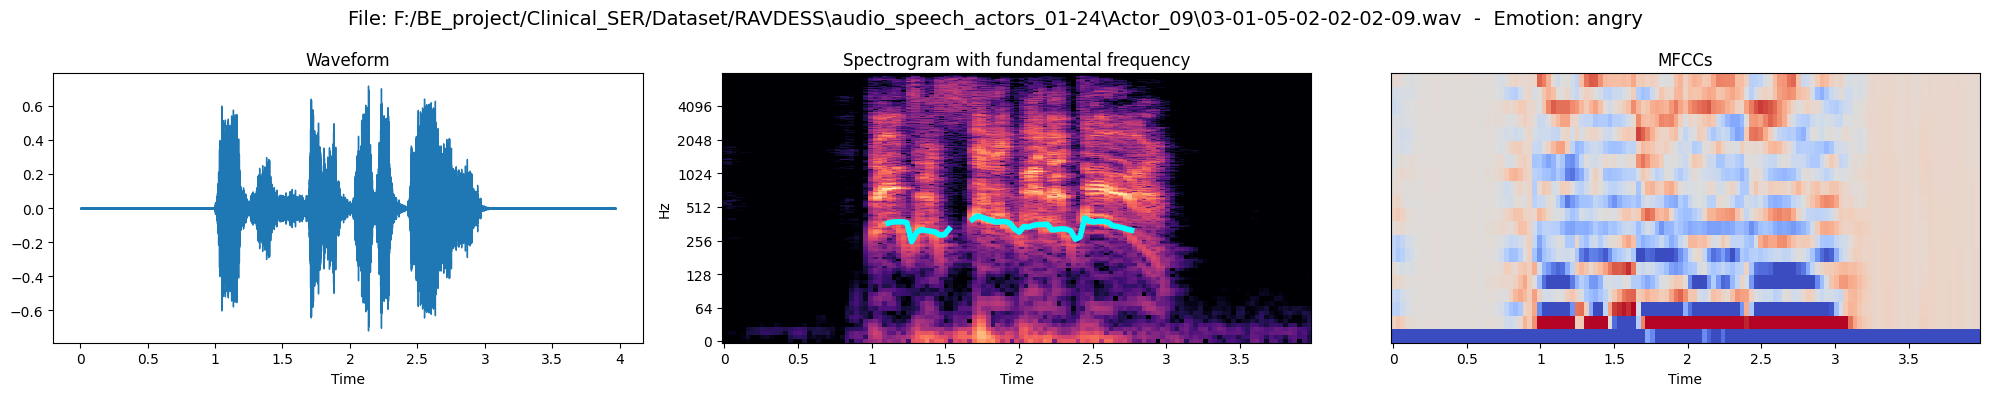

C:\Users\DELL\AppData\Local\Temp\ipykernel_22920\1503704903.py:37: FutureWarning: Pass y=[ 1.6751346e-04  1.6261841e-04 -1.7327978e-04 ...  7.7549936e-05
  3.9369770e-05  5.6556353e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  x_mfccs = librosa.feature.mfcc(y, sr=sr, n_mfcc=20)


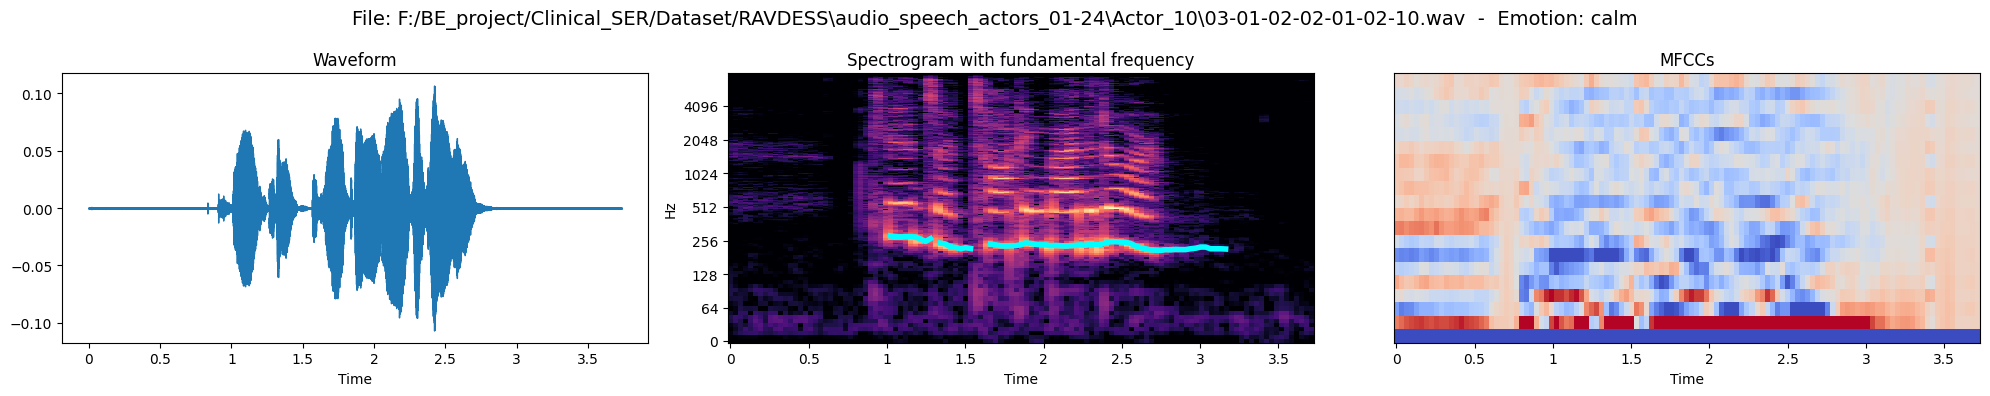

C:\Users\DELL\AppData\Local\Temp\ipykernel_22920\1503704903.py:37: FutureWarning: Pass y=[ 2.7171424e-08 -4.4152397e-08  6.2506523e-08 ... -3.4608154e-06
  2.2584202e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  x_mfccs = librosa.feature.mfcc(y, sr=sr, n_mfcc=20)


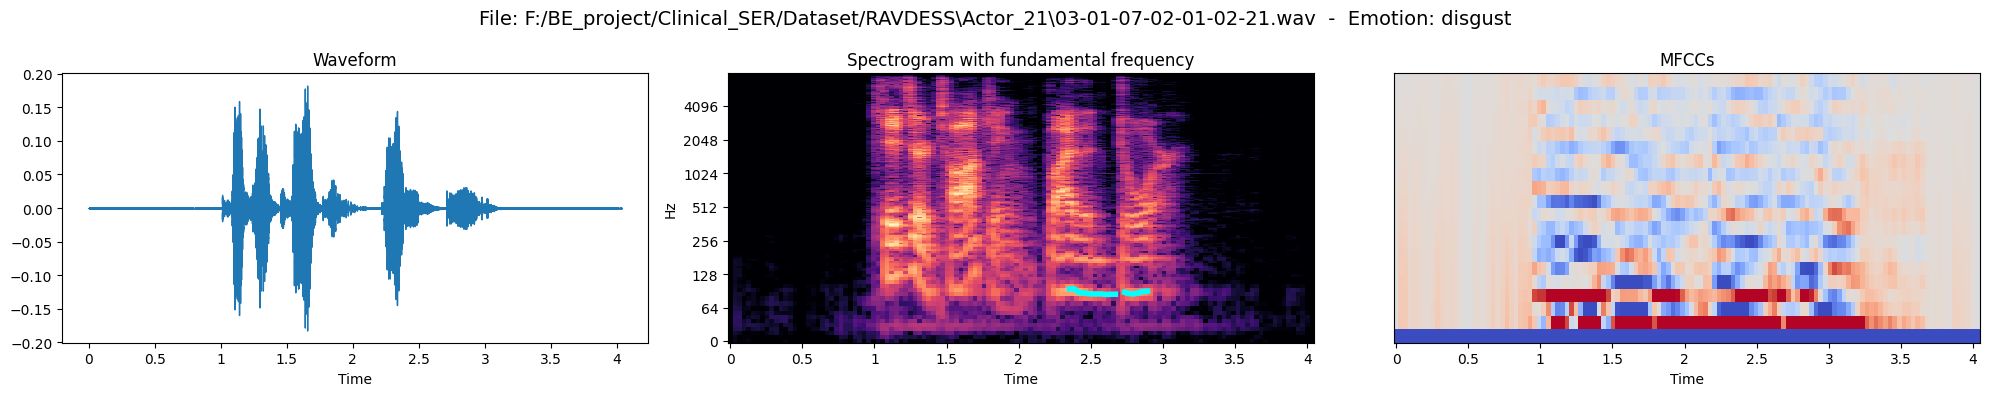

C:\Users\DELL\AppData\Local\Temp\ipykernel_22920\1503704903.py:37: FutureWarning: Pass y=[-1.4115457e-08  3.0237644e-08 -4.9546230e-08 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  x_mfccs = librosa.feature.mfcc(y, sr=sr, n_mfcc=20)


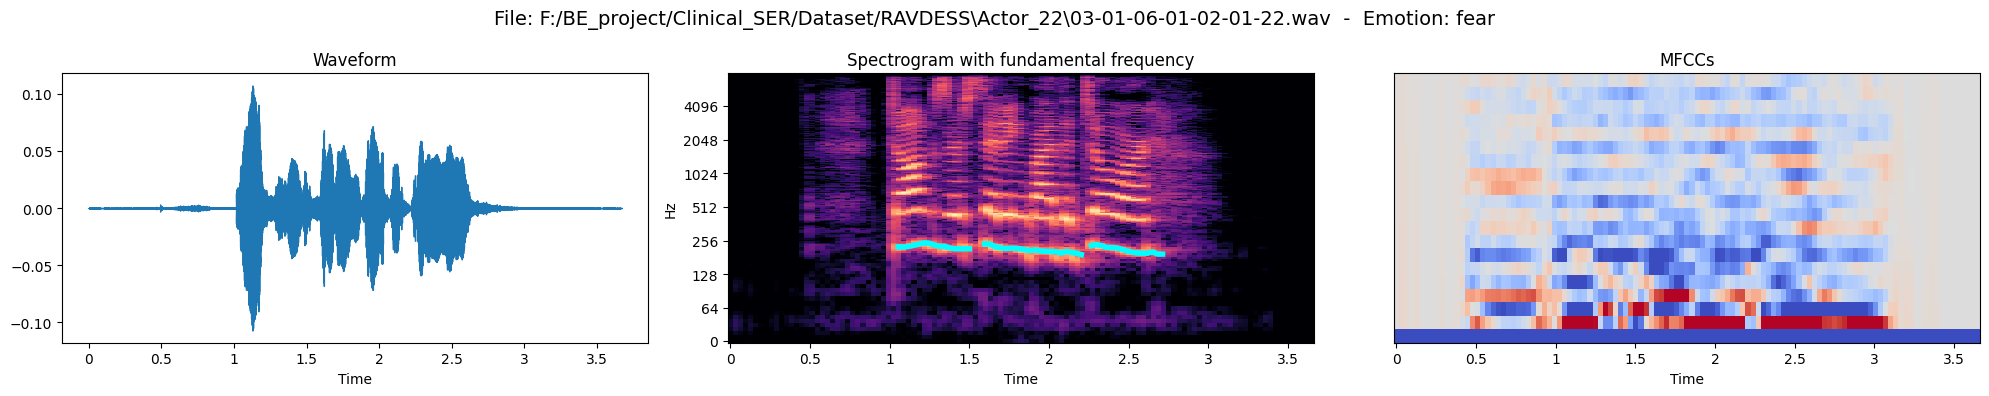

C:\Users\DELL\AppData\Local\Temp\ipykernel_22920\1503704903.py:37: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.2565886e-06
 -1.3429186e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  x_mfccs = librosa.feature.mfcc(y, sr=sr, n_mfcc=20)


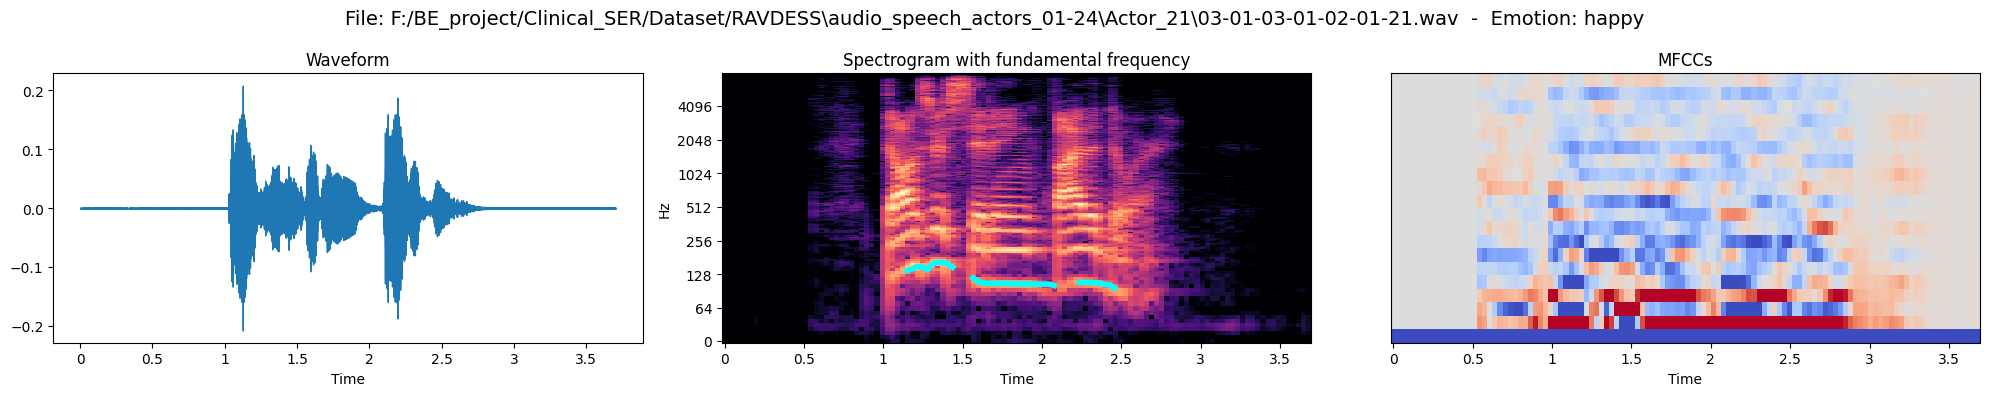

C:\Users\DELL\AppData\Local\Temp\ipykernel_22920\1503704903.py:37: FutureWarning: Pass y=[ 5.6814373e-04  9.4288582e-04  8.2788465e-04 ... -6.1779821e-05
 -5.2441814e-05 -5.2212115e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  x_mfccs = librosa.feature.mfcc(y, sr=sr, n_mfcc=20)


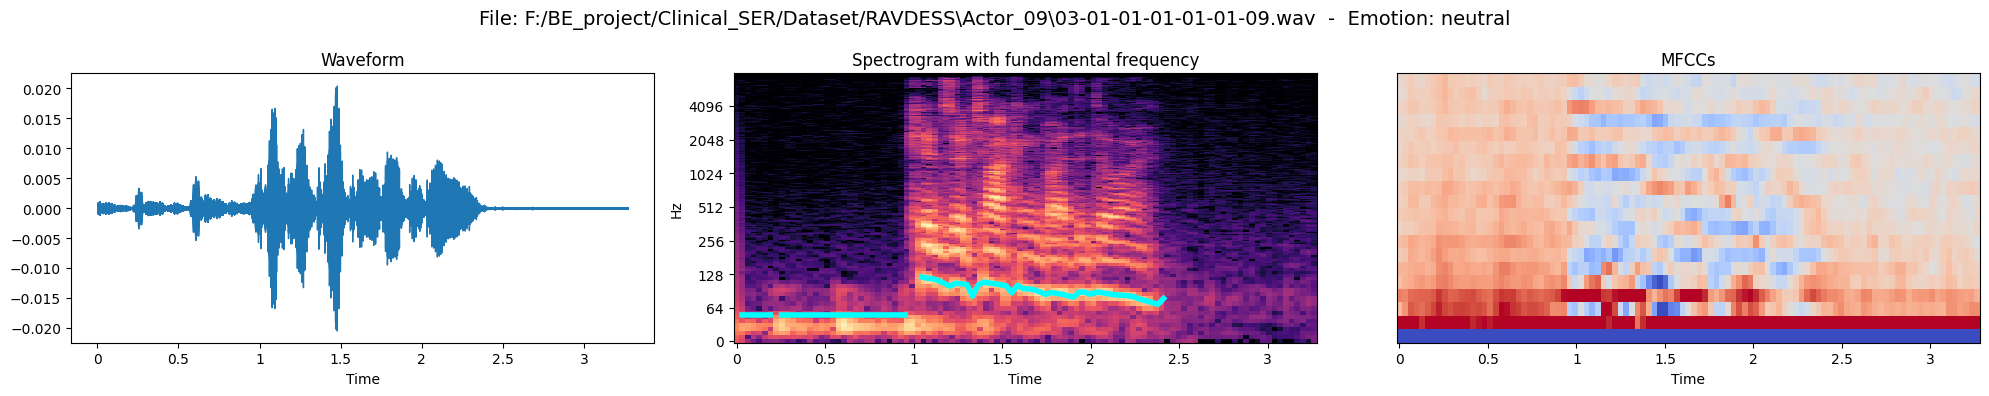

C:\Users\DELL\AppData\Local\Temp\ipykernel_22920\1503704903.py:37: FutureWarning: Pass y=[-1.0547417e-06  6.4464143e-06  9.2404953e-06 ...  2.3457226e-12
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  x_mfccs = librosa.feature.mfcc(y, sr=sr, n_mfcc=20)


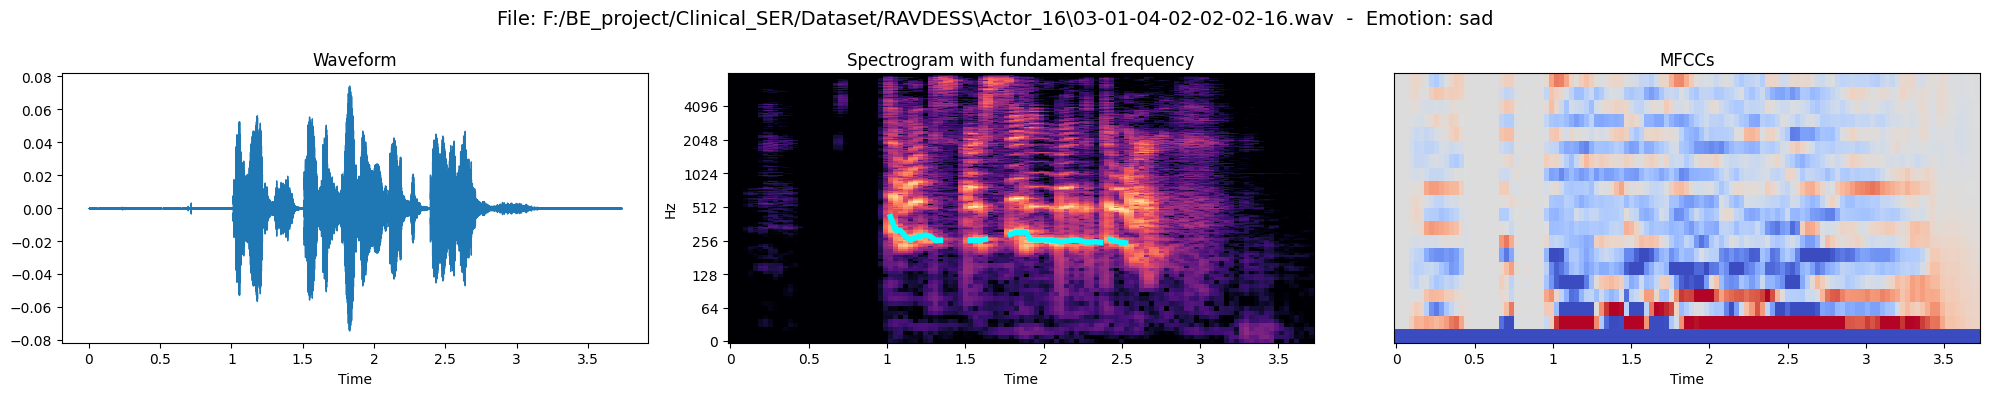

C:\Users\DELL\AppData\Local\Temp\ipykernel_22920\1503704903.py:37: FutureWarning: Pass y=[-2.2522687e-05 -2.1661879e-05 -1.5616946e-05 ...  2.0418309e-04
  2.2933284e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  x_mfccs = librosa.feature.mfcc(y, sr=sr, n_mfcc=20)


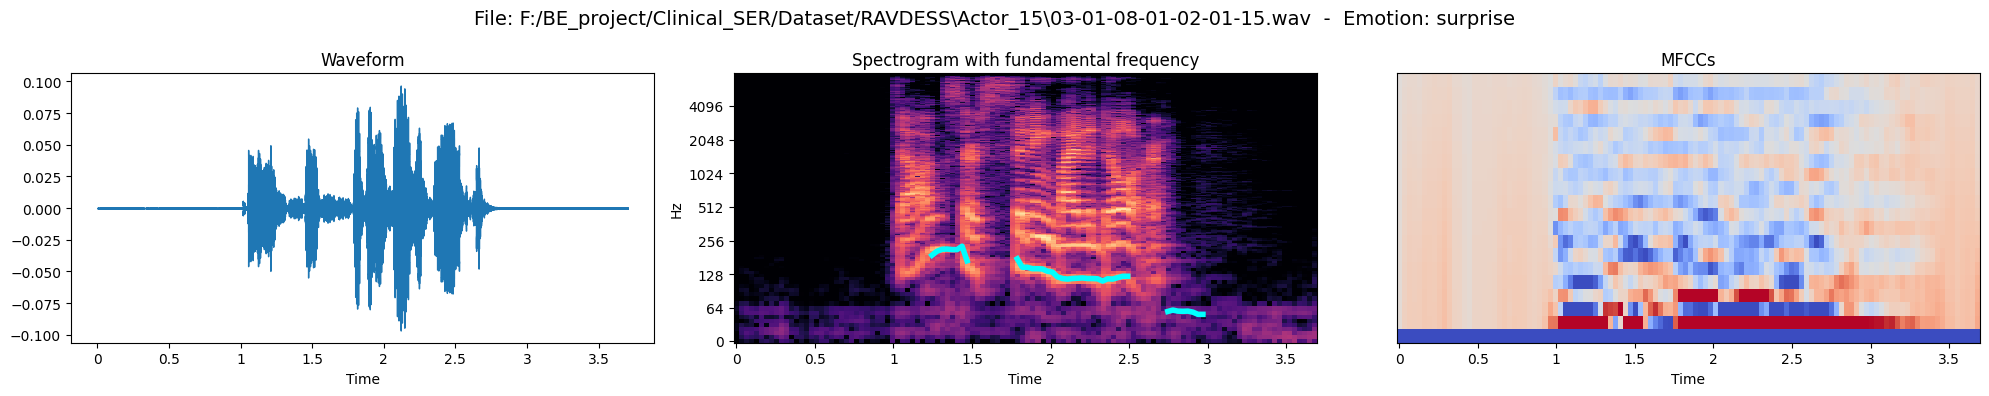

In [20]:
# Getting ordered list of emotions ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
emotions = sorted(list(df.emotion.unique()))

# Get waveforms, spectograms, mfccs and media player for each emotion
for emotion in emotions:
    show_audio(emotion)

In [21]:
mfccs = []

for file in df.path:
    # load audio file:
    y, sr = librosa.load(file, sr=16000)
    
    # Extract 'n_mfcc' numbers of MFCCs components - in this case 30
    mfccs.append(librosa.feature.mfcc(y=y, sr=sr, fmin=50, n_mfcc=30))

In [22]:
# Define function to resize the 2D arrays
def resize_array(array):
    new_matrix = np.zeros((30,150))   # Initialize the new matrix shape with an array 30X150 of zeros
    for i in range(30):               # Iterate rows
        for j in range(150):          # Iterate columns
            try:                                 # the mfccs of a sample will replace the matrix of zeros, then cutting the array up to 150
                new_matrix[i][j] = array[i][j]
            except IndexError:                   # if mfccs of a sample is shorter than 150, then keep looping to extend lenght to 150 with 0s
                pass
    return new_matrix

# Create a variable to store the new resized mfccs and apply function for all the extracted mfccs
resized_mfccs = []

for mfcc in mfccs:
    resized_mfccs.append(resize_array(mfcc))

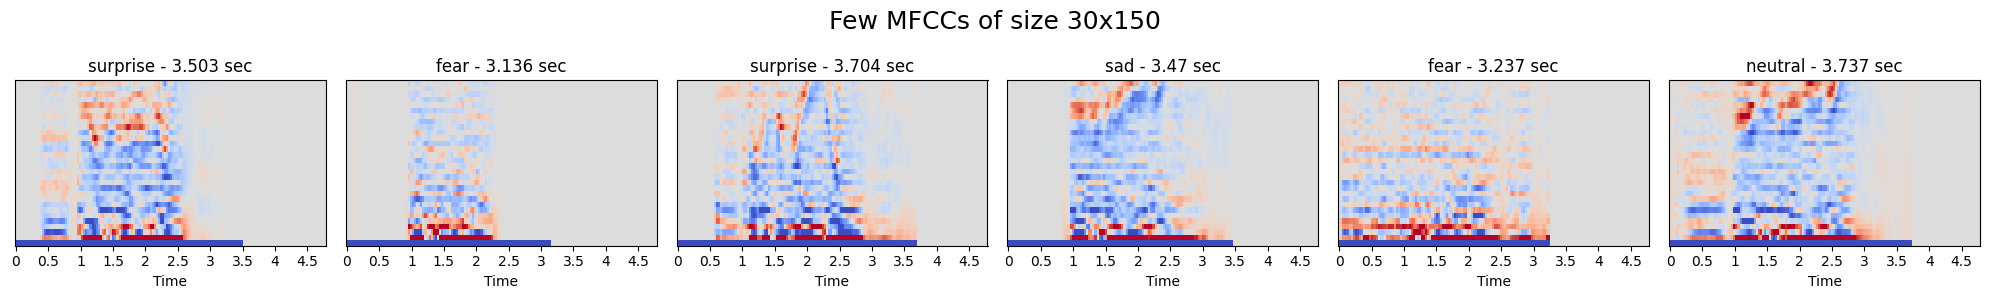

In [23]:
# Create sublots
fig, axs = plt.subplots(nrows=1,ncols=6, figsize=(20,3))

# Select 6 random MFCCs
for i in range(6):
    index = random.randint(0, len(resized_mfccs))
    
    # Plot MFCCs
    librosa.display.specshow(resized_mfccs[index], sr=sr, x_axis="time", ax=axs[i], norm=Normalize(vmin=-50, vmax=50))
    axs[i].set_title(str(df.emotion[index]) + ' - ' + str(df.duration[index]) + ' sec')

plt.suptitle('Few MFCCs of size 30x150', size=18)
plt.tight_layout()
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

# Select target
df['emotion'].replace({'angry':0,'disgust':1,'fear':2,'happy':3,'neutral':4,'sad':5,'surprise':6, 'calm':7}, inplace=True)
y = df.emotion.values

# Features
X = resized_mfccs.copy()

# Create train, validation and test set
x_tr, x_te, y_tr, y_te = train_test_split(X, y, train_size=0.9, shuffle=True, random_state=0)
x_tr, x_va, y_tr, y_va = train_test_split(x_tr, y_tr, test_size=0.3, shuffle=True, random_state=0)

# Convert data to numpy arrays
x_tr = np.array([i for i in x_tr])
x_va = np.array([i for i in x_va])
x_te = np.array([i for i in x_te])

# Plot size of data
print(x_tr.shape)
print(x_va.shape)
print(x_te.shape)

(1814, 30, 150)
(778, 30, 150)
(288, 30, 150)


In [25]:
df.head(5)

,path,duration,emotion
0,F:/BE_project/Clinical_SER/Dataset/RAVDESS\Act...,3.303,4
1,F:/BE_project/Clinical_SER/Dataset/RAVDESS\Act...,3.337,4
2,F:/BE_project/Clinical_SER/Dataset/RAVDESS\Act...,3.270,4
3,F:/BE_project/Clinical_SER/Dataset/RAVDESS\Act...,3.170,4
4,F:/BE_project/Clinical_SER/Dataset/RAVDESS\Act...,3.537,7


In [26]:
# Get mean and standard deviation from the training set
tr_mean = np.mean(x_tr, axis=0)
tr_std = np.std(x_tr, axis=0)

# Apply data scaling
x_tr = (x_tr - tr_mean)/tr_std
x_va = (x_va - tr_mean)/tr_std
x_te = (x_te - tr_mean)/tr_std

In [27]:
# Add the 'channel' dimension to the MFCCs spectrum input 'images'
print(f"x_tr has a dimension of {x_tr.shape} before the manipulation.")

x_tr = x_tr[..., None]
x_va = x_va[..., None]
x_te = x_te[..., None]

print(f"x_tr has a dimension of {x_tr.shape} after the manipulation.")

x_tr has a dimension of (1814, 30, 150) before the manipulation.
x_tr has a dimension of (1814, 30, 150, 1) after the manipulation.


In [28]:
from tensorflow import keras
from tensorflow.keras.layers import (Conv2D, BatchNormalization, Dropout, Flatten, Dense, MaxPool2D)
from tensorflow.keras import initializers

# Create convolutional neural network and return summary
model = keras.Sequential()
model.add(Conv2D(filters=64, kernel_size=5, strides=(2, 2), activation="relu", input_shape=x_tr.shape[1:]))
model.add(MaxPool2D(pool_size=2))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=4, strides=(2, 1), activation="relu"))
model.add(MaxPool2D(pool_size=2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=8, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 73, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 36, 64)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 6, 36, 64)        256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 33, 32)         32800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 16, 32)        0         
 2D)                                                             
                                                        

In [29]:
# Compile the model using Adam's default learning rate
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Create 'EarlyStopping' callback
earlystopping_cb = keras.callbacks.EarlyStopping(patience=10)

In [30]:
%%time

#  Train the neural network
history = model.fit(
    x = np.asarray(x_tr).astype('float32'),
    y=np.asarray(y_tr).astype('float32'),
    epochs=100,
    batch_size=32,
    validation_data=(np.asarray(x_va).astype('float32'), np.asarray(y_va).astype('float32')),
    callbacks=[earlystopping_cb]
)

Epoch 1/100
57/57 [==============================] - 3s 27ms/step - loss: 2.9553 - accuracy: 0.1422 - val_loss: 1.9941 - val_accuracy: 0.2918
Epoch 2/100
57/57 [==============================] - 1s 25ms/step - loss: 2.2609 - accuracy: 0.2001 - val_loss: 1.9954 - val_accuracy: 0.3046
Epoch 3/100
57/57 [==============================] - 1s 25ms/step - loss: 2.1279 - accuracy: 0.2051 - val_loss: 1.9666 - val_accuracy: 0.2892
Epoch 4/100
57/57 [==============================] - 1s 25ms/step - loss: 1.9909 - accuracy: 0.2315 - val_loss: 1.9123 - val_accuracy: 0.3098
Epoch 5/100
57/57 [==============================] - 1s 25ms/step - loss: 1.9387 - accuracy: 0.2574 - val_loss: 1.8492 - val_accuracy: 0.3342
Epoch 6/100
57/57 [==============================] - 1s 25ms/step - loss: 1.8830 - accuracy: 0.2740 - val_loss: 1.7686 - val_accuracy: 0.3573
Epoch 7/100
57/57 [==============================] - 1s 25ms/step - loss: 1.8096 - accuracy: 0.2955 - val_loss: 1.7161 - val_accuracy: 0.3830
Epoch 

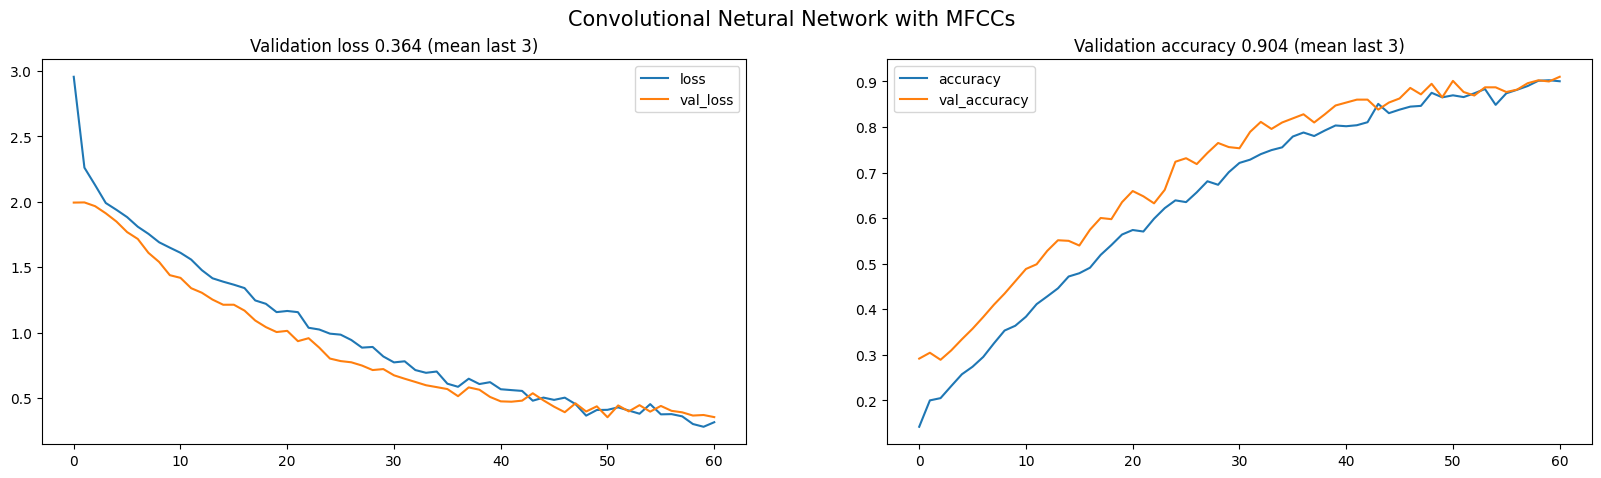

In [31]:
# Plots neural network performance metrics for train and validation
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
plt.suptitle('Convolutional Netural Network with MFCCs', size=15)
results = pd.DataFrame(history.history)
results[["loss", "val_loss"]].plot(ax=axs[0])
axs[0].set_title("Validation loss {:.3f} (mean last 3)".format(np.mean(history.history["val_loss"][-3:])))
results[["accuracy", "val_accuracy"]].plot(ax=axs[1])
axs[1].set_title("Validation accuracy {:.3f} (mean last 3)".format(np.mean(history.history["val_accuracy"][-3:])))
plt.show()

The training and validation accuracies are both improving during the first ~50 epochs, then we start to see signals of overfitting.

In [32]:
# Collect loss and accuracy for the test set
loss_te, accuracy_te = model.evaluate(x_te, y_te)

print("Test loss: {:.2f}".format(loss_te))
print("Test accuracy: {:.2f}%".format(100 * accuracy_te))

9/9 [==============================] - 0s 7ms/step - loss: 0.3906 - accuracy: 0.8993
Test loss: 0.39
Test accuracy: 89.93%


In [33]:
print(x_te.shape)

(288, 30, 150, 1)


9/9 [==============================] - 0s 6ms/step


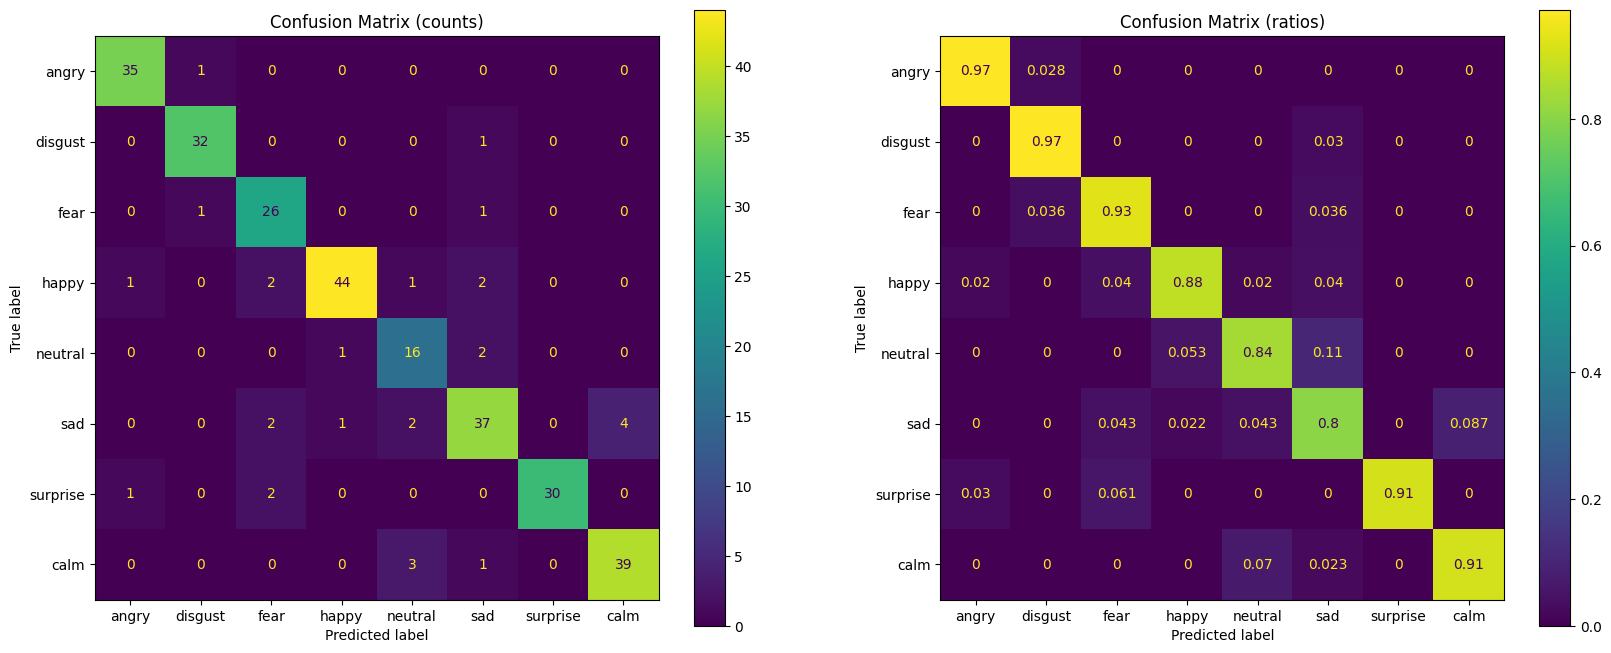

In [34]:
# Compute test set predictions
predictions = model.predict(x_te)

pred = []

for i in predictions:
    pred.append(np.argmax(i))
    
from sklearn.metrics import ConfusionMatrixDisplay

labels = {'angry':0,'disgust':1,'fear':2,'happy':3,'neutral':4,'sad':5,'surprise':6, 'calm':7}

def plot_confusion_matrices(y_true, y_pred):

    # Create two subplots
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # Plots the standard confusion matrix
    ax1.set_title("Confusion Matrix (counts)")
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=labels, ax=ax1)

    # Plots the normalized confusion matrix
    ax2.set_title("Confusion Matrix (ratios)")
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=labels, normalize="true", ax=ax2)

    plt.show()

# Plot confusion matrices
plot_confusion_matrices(y_te, pred)

## Save Model

In [35]:
model_name = 'SER.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at F:\BE_project\Clinical_SER\saved_models\SER.h5 


## Load Model

In [36]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [37]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/SER.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='sparse_categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])
score = loaded_model.evaluate(x_te, y_te)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
9/9 [==============================] - 0s 7ms/step - loss: 0.3906 - accuracy: 0.8993
accuracy: 89.93%


## Real time 

In [66]:
data, sampling_rate = librosa.load('output1.wav')

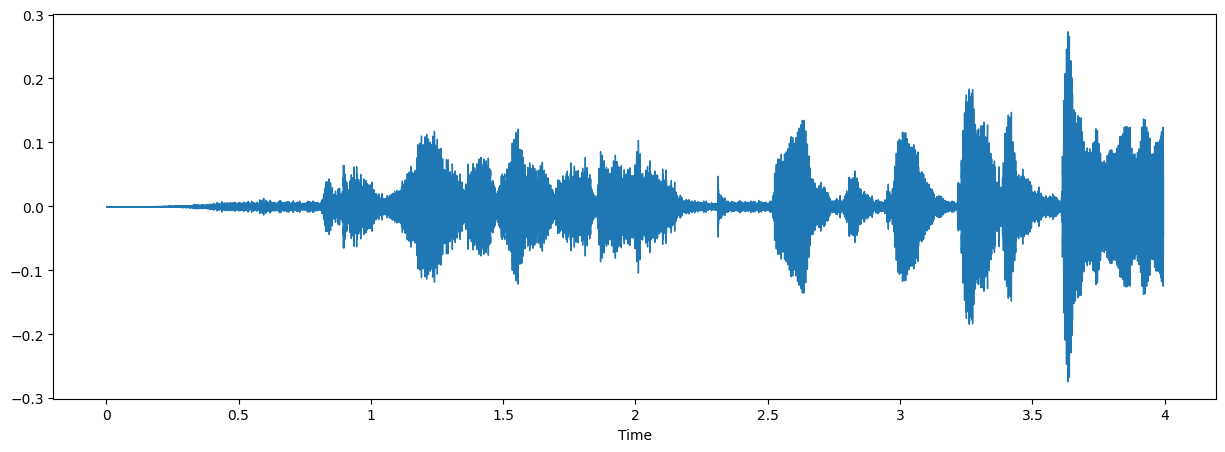

In [52]:

import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

In [130]:
#livedf= pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load('e-sad.wav',sr=16000)
sample_rate = np.array(sample_rate)
mfccs = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=30)


In [131]:
r_mfccs=resize_array(mfccs)

In [132]:
r_mfccs.shape

(30, 150)

In [133]:
m_arr = np.array([r_mfccs])
m_arr.shape

(1, 30, 150)

In [134]:
m_arr = (m_arr - tr_mean)/tr_std

In [135]:
m_arr = m_arr[..., None]
m_arr.shape

(1, 30, 150, 1)

In [136]:
livepreds = loaded_model.predict(m_arr)

1/1 [==============================] - 0s 18ms/step


In [137]:
livepreds

array([[2.0542386e-05, 1.6389396e-03, 3.1825502e-03, 1.1895009e-03,
        2.8376568e-03, 9.8325413e-01, 5.2599240e-05, 7.8240382e-03]],
      dtype=float32)

In [138]:
livepreds1=livepreds.argmax(axis=1)

In [139]:
liveabc = livepreds1.astype(int).flatten()
liveabc

array([5])

In [140]:
df = pd.DataFrame(liveabc)
df.replace({0:'angry',1:'disgust',2:'fear', 3:'happy', 4:'neutral', 5:'sad',6:'surprise',7: 'calm'}, inplace=True)

In [141]:
print(df)

     0
0  sad
